### Prueba técnica Artyco. Segmentación de clientes.

In [161]:
import pandas as pd

data = pd.read_csv('data.csv', sep=';')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,5,10,3,0,0,0,0,0,0,0


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Como se puede observar todas las variables son de tipo numérico menos Education (categórica), Martial_Status (categórica) y Dt_Customer (fecha). A continuación se van a estudiar más detenidamente para ver que transformaciones pueden ser las idóneas para trabajar con ellas.  
Además se puede observar que hay NA en algunas de las variables como Income, también se va a estudiar como solucionar este problema.  

In [163]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Al observar los valores de las variables numéricas se puede apreciar que las escalas de cada una de ellas son bastantes diferentes, por lo que cuando se realice algún tipo de clustering o análisis de componentes principales será una buena idea normalizar todas las variables para que estén en un rango de valores similar.

In [164]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

En primer lugar la variable Dt_Customer que es una fecha, la vamos a transformar en el número de meses que lleva cada cliente relacionado con la empresa, para así tener un valor numérico de dicha variable.

In [165]:
# Transformar la variable Dt_Customer a número de meses que lleva relacionado con la empresa

from datetime import datetime

date = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

data['customer_months'] = ((date - data['Dt_Customer'])/np.timedelta64(1, 'M'))
data['customer_months'] = data['customer_months'].astype(int)

In [166]:
del data['Dt_Customer']

In [167]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,customer_months
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,4,7,0,0,0,0,0,0,1,128
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,5,0,0,0,0,0,0,0,100
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,10,4,0,0,0,0,0,0,0,112
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,4,6,0,0,0,0,0,0,0,98
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,6,5,0,0,0,0,0,0,0,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,4,5,0,0,0,0,0,0,0,114
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,5,7,0,0,0,1,0,0,0,98
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,13,6,0,1,0,0,0,0,0,107
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,...,10,3,0,0,0,0,0,0,0,107


Las otras dos variables de tipo categórico tienen 5 y 8 valores diferentes,  a continuación vamos a ver cual es la proporción de cada uno de estos factores respecto al total de observaciones que hay en el dataset.

<AxesSubplot:>

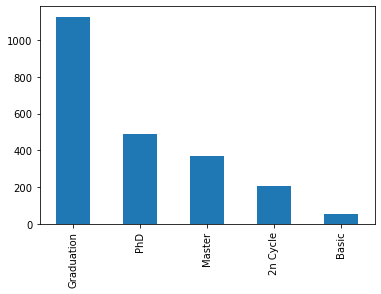

In [168]:
data['Education'].value_counts().plot(kind='bar')

<AxesSubplot:>

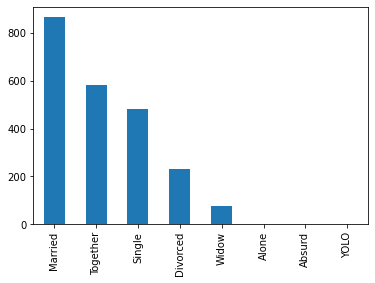

In [169]:
data['Marital_Status'].value_counts().plot(kind='bar')

Como tienen ambas variables varios factores cada una y no hay ninguno que sea considerablemente mayoritario respecto al resto, como para poder considerar solo la clase perteneciente a ese factor o a los otros. Para no distorsionar demasiado los gráficos de PCA no se van a tener en cuenta estas dos variables.

Se ha probado la opción de en ambos casos generar variables dummies con one hot encoding, de forma que para cada uno de los factores de estas variables se crease una nueva variable con 1 si pertenecía ha dicha categoría o 0 si no. Pero a la hora de generar los gráficos con las componentes principales distorsionaban demasiado los gráficos, y a la hora de generar los clusters los resultados obtenidos eran bastante similares.

In [170]:
del data['Marital_Status']
del data['Education']

In [171]:
# Count NA for each column
 
for i in data.columns:
    print(i, 'has',data[i].isna().sum(), 'NA')

ID has 0 NA
Year_Birth has 0 NA
Income has 24 NA
Kidhome has 0 NA
Teenhome has 0 NA
Recency has 0 NA
MntWines has 0 NA
MntFruits has 0 NA
MntMeatProducts has 0 NA
MntFishProducts has 0 NA
MntSweetProducts has 0 NA
MntGoldProds has 0 NA
NumDealsPurchases has 0 NA
NumWebPurchases has 0 NA
NumCatalogPurchases has 0 NA
NumStorePurchases has 0 NA
NumWebVisitsMonth has 0 NA
AcceptedCmp3 has 0 NA
AcceptedCmp4 has 0 NA
AcceptedCmp5 has 0 NA
AcceptedCmp1 has 0 NA
AcceptedCmp2 has 0 NA
Complain has 0 NA
Response has 0 NA
customer_months has 0 NA


Como solo hay NA en una columna y son solo 24 observaciones respecto a las 2240 totales, se van a eliminar dichas observaciones y se seguirá trbajando con el resto que están en correctas condiciones.

In [172]:
data = data.dropna()

Además como comprobación extra vemos que de la variables ID hay 2240 valores únicos, tantos como observaciones en el dataset, por lo tanto aseguramos que la información de cada cliente viene recogida en una misma observación y no hay datos duplicados (con el siguiente código se puede comprobar esto).

In [173]:
data[data.duplicated()]

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,customer_months


<AxesSubplot:>

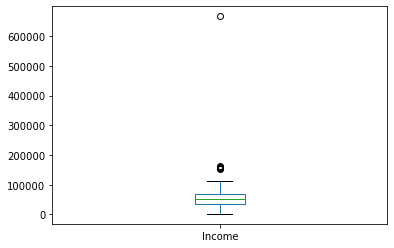

In [174]:
## Outliers

data['Income'].plot(kind = 'box')

En la variable Income hay un outlier demasiado lejano al resto de valores de esa variable, esto va a producir que cuando se creen los clusters seguramente se vaya a necesitar uno solo para esta sola observación. Así que la mejor idea va a ser eliminar esta observación del dataset.  
En el resto de variables aunque hay algún outlier no es tan desproporcionado como este y por ahora no se van a eliminar.

In [175]:
data = data[data['Income'] < 600000]

Text(0.5, 1.0, 'Correlation Heatmap')

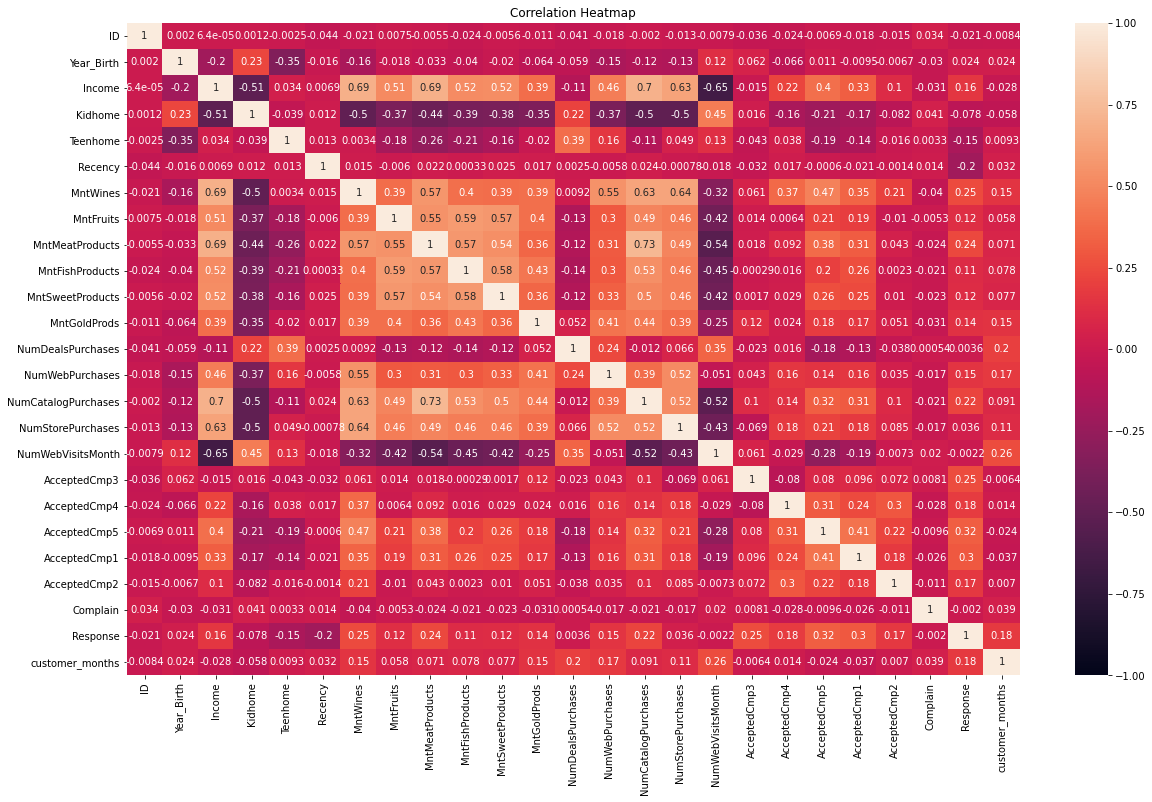

In [176]:
## Correlation Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,12))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap')

### Modelado

In [177]:
# Normalizar las variables

from sklearn.preprocessing import MinMaxScaler

scaled_data = MinMaxScaler().fit_transform(data)

In [188]:
# Generar las componentes principales. Se van a usar las dos principales para ver en una gráfica la distribución de los datos

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(scaled_data)
data_2d = pca.transform(scaled_data)
data_2d

array([[ 0.76545833,  0.36936537],
       [-0.54982318,  0.07906921],
       [ 0.26742886, -0.29180293],
       ...,
       [ 0.47128446, -0.44257911],
       [ 0.19299559, -0.3322611 ],
       [-0.07886902,  0.751542  ]])

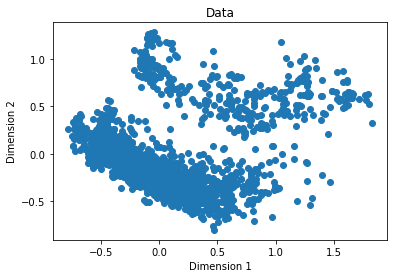

In [189]:
%matplotlib inline

plt.scatter(data_2d[:,0],data_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

In [190]:
pca.explained_variance_ratio_

array([0.22856723, 0.12831854])

Solo el 35,7% de la relación entre nuestros datos está explicado por las dos primeras componentes principales.  

Viendo el gráfico anterior de todos los puntos representados con estas dos componentes principales podría hacernos pensar que hay 2 clusters, la nube de puntos superior e inferior. Pero como vamos a ver más adelante no va a ser así, ya que al crear dos clusters los puntos se van a agrupar de otra forma totalmente diferente. Esto se debe a que las componentes principales no representan gran parte de la información de nuestros datos.

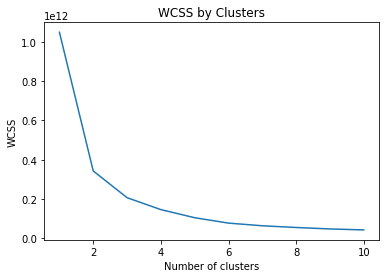

In [183]:

from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(data.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

La medida WCSS (within cluster sum of squares) es usado para elegir el número óptimo de clusters, cuanto más bajo sea el valor más cercanos estan los puntos dentro de los clusters. Pero hay que tener en cuenta que hay un momento en el que esta medida se empieza a estancar ya que los clusters ya estan bastante definidos y un nuevo centroide lo que va a generar es que estos clusters de puntos bastante homogeneos se vayan dividiendo en dos nuevos clusters.  

Por lo tanto para nuestro caso el número óptimo va a ser o 2 o 3, ya que aunque la mejora más grande es de 1 a 2 clusters, en el salto de 2 a 3 sigue habiendo una mejora considerable y ya en el salto de 3 a 4 empieza a converger esta mejora.

In [192]:
# Crear un modelo kmeans con 2 centroides
model = KMeans(n_clusters=2, init='k-means++', n_init=100, max_iter=1000)

# Entrenamos el modelo con nuestros datos
km_clusters = model.fit_predict(data.values)

km_clusters

array([0, 1, 0, ..., 0, 0, 0])

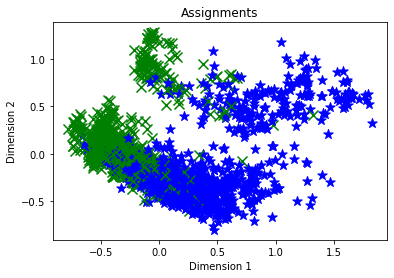

In [193]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green'}
    mrk_dic = {0:'*',1:'x'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(data_2d, km_clusters)

In [195]:
# Crear un modelo kmeans con 3 centroides
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)

# Entrenamos el modelo con nuestros datos
km_clusters = model.fit_predict(data.values)

km_clusters

array([0, 0, 2, ..., 0, 2, 0])

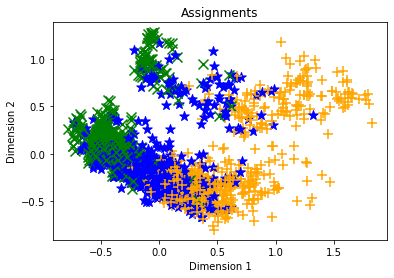

In [196]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(data_2d, km_clusters)

In [186]:
data['Clusters'] = km_clusters

A continuación podemos ver como la distribución de puntos en cada uno de estos 3 clusters es bastante similar.

In [187]:
import numpy as np

unique, counts = np.unique(km_clusters, return_counts=True)
np.asarray((unique, counts)).T

array([[  0, 685],
       [  1, 746],
       [  2, 784]], dtype=int64)